In [10]:
import keras
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import utilities as util
import pixel as pix
import tile

In [8]:
os.environ["CUDA_VISIBLE_DEVICES"]="1";

In [3]:
model = keras.models.load_model('/deep_data/resnet_1.h5')


In [11]:
landsat, sentinel, dem, label = util.load_data()
tile_size = 64
num_classes = util.get_class_count()
pixel_gen = pix.pixel_gen(landsat, sentinel, dem, label, tile_size, num_classes)
tile_gen = tile.tile_gen(landsat, sentinel, dem, label, tile_size, num_classes)

In [16]:
pixels = pixel_gen.gen_pixels(10000, index=5, balanced=True)

pixels generated 8125


126/126 [==============================] - 34s 270ms/step
Accuracy is 0.38095238095238093


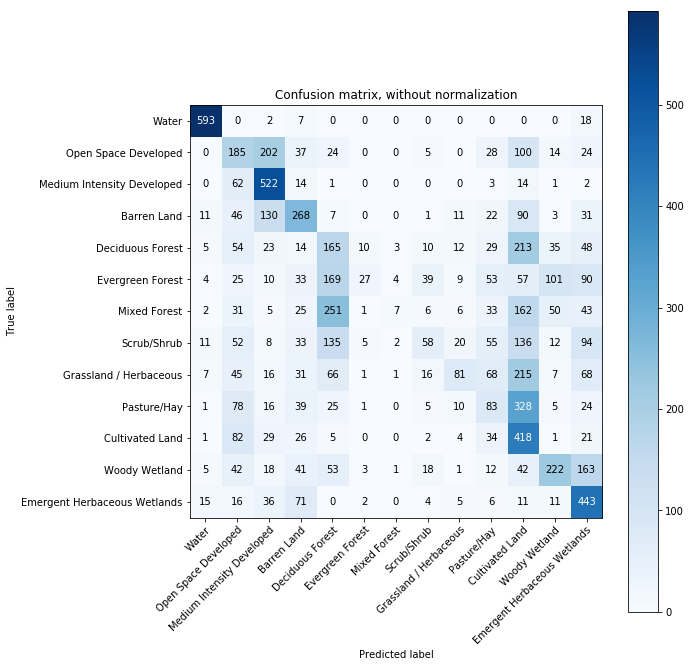

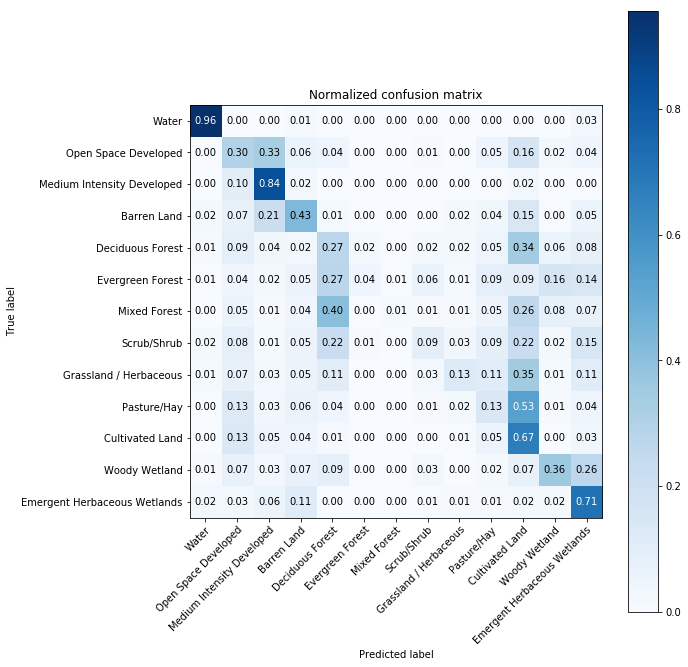

In [17]:
tile_gen.evaluate_cnn(model, pixels)